In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
data = pd.read_csv("flipkart_product.csv")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xff in position 77: invalid start byte

In [3]:
# solving the upper error
data = pd.read_csv("flipkart_product.csv", encoding='latin1')

In [4]:
data.head(5)

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Super!,Great cooler.. excellent air flow and for this...
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Awesome,Best budget 2 fit cooler. Nice cooling
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,The quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",1,Useless product,Very bad product it's a only a fan
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,Ok ok product


In [5]:
data.drop(columns=['ProductName','Price','Review'],inplace=True)

In [6]:
data.head(5)

,Rate,Summary
0,5,Great cooler.. excellent air flow and for this...
1,5,Best budget 2 fit cooler. Nice cooling
2,3,The quality is good but the power of air is de...
3,1,Very bad product it's a only a fan
4,3,Ok ok product


In [7]:
data.isnull().sum()

Rate        1
Summary    14
dtype: int64

In [8]:
data.dropna()

,Rate,Summary
0,5,Great cooler.. excellent air flow and for this...
1,5,Best budget 2 fit cooler. Nice cooling
2,3,The quality is good but the power of air is de...
3,1,Very bad product it's a only a fan
4,3,Ok ok product
...,...,...
189868,5,Good
189869,5,Thanks
189870,5,Good
189871,5,Super


In [9]:
pd.unique(data['Summary'])

array(["Great cooler.. excellent air flow and for this price. It's so amazing and unbelievable.Just love it \x83\x9d?\x8b?\x8f",
       'Best budget 2 fit cooler. Nice cooling',
       'The quality is good but the power of air is decent', ...,
       'Best for winter',
       "It's a nice product...thanks very much to Flipcart for the speedy service ð\x9f\x98\x80 ð\x9f\x91\x8d",
       'Thanks â\x9d¤ï¸\x8f'], dtype=object)

<Axes: xlabel='Rate', ylabel='count'>

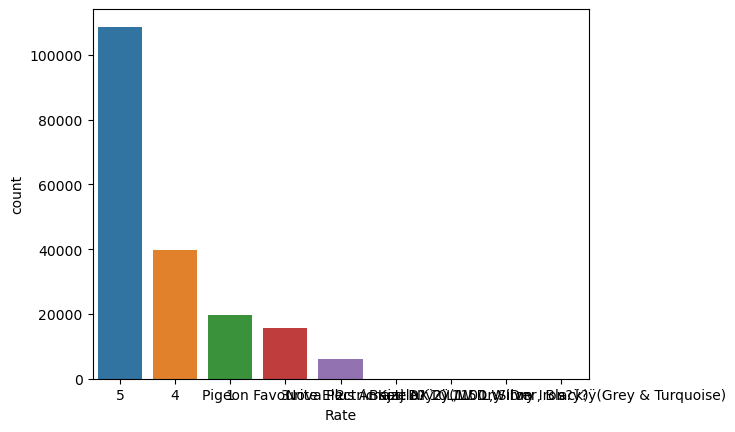

In [10]:
sns.countplot(data=data, 
              x='Rate', 
              order=data.Rate.value_counts().index)

In [11]:
pos_neg = [] 
for i in range(len(data['Rate'])): 
    if data['Rate'][i] >= 5: 
        pos_neg.append(1) 
    else: 
        pos_neg.append(0) 
  
data['label'] = pos_neg 

TypeError: '>=' not supported between instances of 'str' and 'int'

In [12]:
#error handling of above error
data['Rate'] = pd.to_numeric(data['Rate'], errors='coerce')

print(data['Rate'].isna().sum())

pos_neg = []
for rate in data['Rate']:
    if rate >= 5:
        pos_neg.append(1)
    else:
        pos_neg.append(0)

data['Pos_Neg'] = pos_neg

print(data.head())

5
   Rate                                            Summary  Pos_Neg
0   5.0  Great cooler.. excellent air flow and for this...        1
1   5.0             Best budget 2 fit cooler. Nice cooling        1
2   3.0  The quality is good but the power of air is de...        0
3   1.0                 Very bad product it's a only a fan        0
4   3.0                                      Ok ok product        0


In [13]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tqdm import tqdm
import pandas as pd

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text_data):
    preprocessed_text = []

    for sentence in tqdm(text_data):
        sentence = re.sub(r'[^\w\s]', '', sentence)
        preprocessed_text.append(' '.join(
            token.lower() for token in word_tokenize(sentence)
            if token.lower() not in stopwords.words('english')
        ))
    
    return preprocessed_text

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [14]:
data['Summary'] = data['Summary'].astype(str)
preprocessed_review = preprocess_text(data['Summary'].values) 
data['Summary'] = preprocessed_review

100%|█████████████████████████████████████████████████████████████████████████| 189874/189874 [09:13<00:00, 343.16it/s]


In [15]:
data.head()

,Rate,Summary,Pos_Neg
0,5.0,great cooler excellent air flow price amazing ...,1
1,5.0,best budget 2 fit cooler nice cooling,1
2,3.0,quality good power air decent,0
3,1.0,bad product fan,0
4,3.0,ok ok product,0


In [16]:
data["Pos_Neg"].value_counts()

1    108694
0     81180
Name: Pos_Neg, dtype: int64

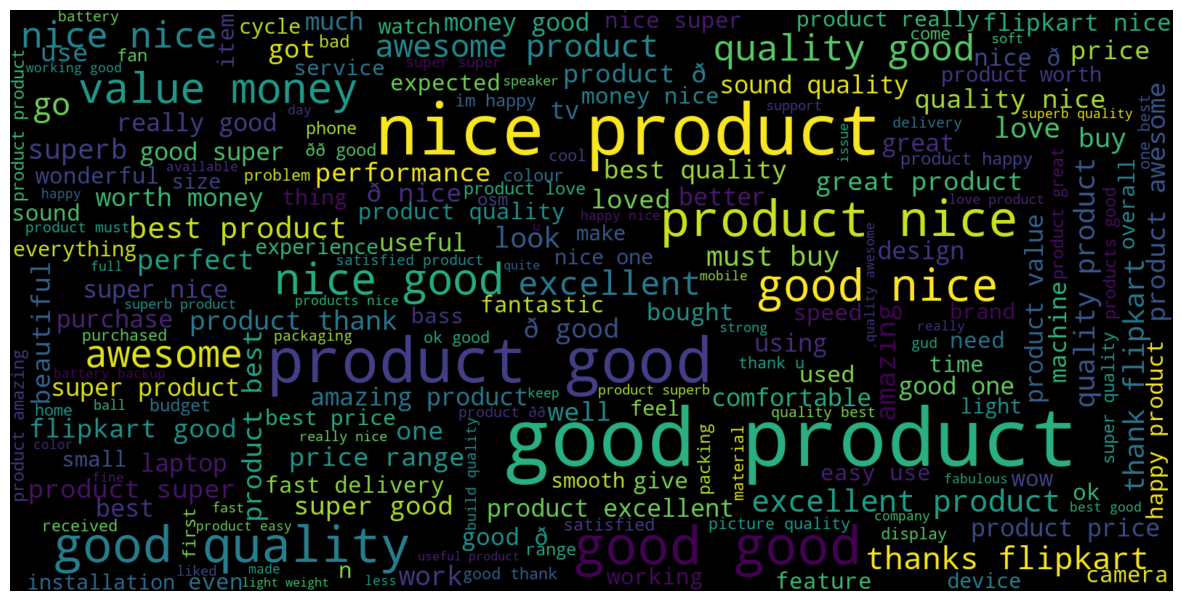

In [17]:
consolidated = ' '.join( 
    word for word in data['Summary'][data['Pos_Neg'] == 1].astype(str)) 
wordCloud = WordCloud(width=1600, height=800, 
                      random_state=21, max_font_size=110) 
plt.figure(figsize=(15, 10)) 
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear') 
plt.axis('off') 
plt.show() 

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=2500) 
X = cv.fit_transform(data['Summary'] ).toarray()

In [19]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, data['Pos_Neg'], 
                                                    test_size=0.33, 
                                                    stratify=data['Pos_Neg'], 
                                                    random_state = 42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
  
model = DecisionTreeClassifier(random_state=0) 
model.fit(X_train,y_train) 
  
#testing the model 
pred = model.predict(X_train) 
print(accuracy_score(y_train,pred))

In [ ]:
from sklearn import metrics 
cm = confusion_matrix(y_train,pred) 
  
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,  
                                            display_labels = [False, True]) 
  
cm_display.plot() 
plt.show()